In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cr=pd.read_csv("E:/datasets/CreditRisk.csv")

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [25]:
cr.isnull().sum()


Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
cr=cr.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]

In [23]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
cr.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,957,978,956.000000,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,775,631,NaN,763,807,NaN,NaN,NaN,NaN,NaN,349,712
mean,NaN,NaN,0.881799,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,1.255623,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [47]:
cr.Gender=cr.Gender.fillna('Male')
cr.Married=cr.Married.fillna('Yes')
cr.Dependents=cr.Dependents.fillna(cr.Dependents.median())
cr.Self_Employed=cr.Self_Employed.fillna('No')
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(cr.Credit_History.median())
cr.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [51]:
cr.Gender=le.fit_transform(cr.Gender)
cr.Married=le.fit_transform(cr.Married)
cr.Education=le.fit_transform(cr.Education)
cr.Self_Employed=le.fit_transform(cr.Self_Employed)
cr.Property_Area=le.fit_transform(cr.Property_Area)
cr.Loan_Status=le.fit_transform(cr.Loan_Status)

In [52]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [53]:
from sklearn.model_selection import train_test_split


In [61]:
cr_train,cr_test=train_test_split(cr,test_size=0.2)
cr_train.shape

(784, 12)

In [74]:
### Train data
cr_train_x=cr_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
cr_train_y=cr_train.iloc[: , 11]

In [77]:
### Test data
cr_test_x=cr_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
cr_test_y=cr_test.iloc[:,11]

In [78]:
cr_train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
200,1,1,1.0,1,0,2600,2500.0,90.0,360.0,1.0,1
13,1,0,0.0,0,0,1853,2840.0,114.0,360.0,1.0,0
577,1,0,0.0,0,0,3229,2739.0,110.0,360.0,1.0,2
141,1,0,0.0,0,0,5417,0.0,168.0,360.0,1.0,2
471,1,1,1.0,1,0,2653,1500.0,113.0,180.0,0.0,0


In [72]:
cr_train_y.head()

200    1
13     0
577    1
141    1
471    0
Name: Loan_Status, dtype: int32

In [82]:
## Apply model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [83]:
lr.fit(cr_train_x,cr_train_y)

LinearRegression()

In [86]:
cr_pred_train=lr.predict(cr_train_x)
cr_pred_test=lr.predict(cr_test_x)

In [88]:
error_train=cr_train_y-cr_pred_train
error_test=cr_test_y-cr_pred_test

In [90]:
rsquare=lr.score(cr_train_x,cr_train_y)
rsquare

0.39848395587016494

In [96]:
N=cr_train_x.shape[0]
K=cr_train_x.shape[1]

In [98]:
AdjRsquare=1-(1-rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.3899131314071751

In [ ]:
##### Things to do to check the Assumption
import numpy as np

In [99]:
np.mean(error_test)

0.0006606641781049973

In [101]:
import matplotlib.pyplot as plt

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

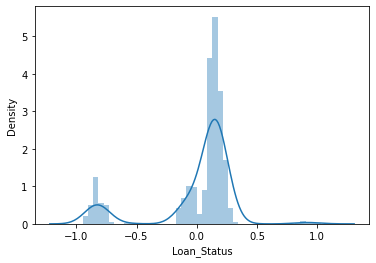

In [103]:
sns.distplot(error_train)

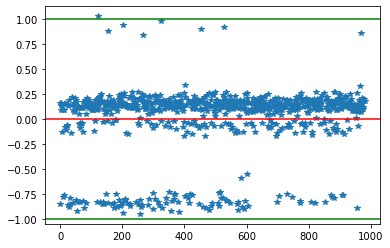

In [107]:
plt.plot(error_train,"*")
plt.axhline(y=np.mean(error_train),color="r")
plt.axhline(y=1,color="g")
plt.axhline(y=-1,color="g")

In [109]:
pred_actual=pd.DataFrame({"Predicted":cr_pred_train,"Actual":cr_train_y})

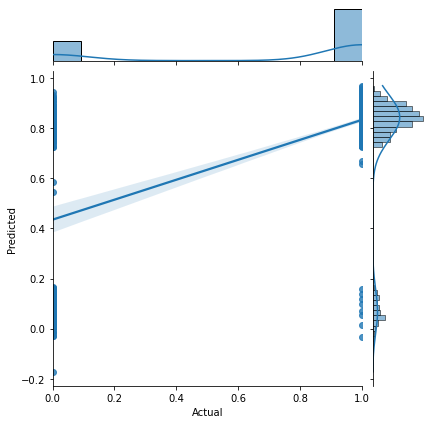

In [112]:
sns.jointplot(x="Actual",y="Predicted",data=pred_actual,kind='reg')

In [115]:
MSE_cr=np.mean(np.square(error_test))
MSE_cr

0.09797400051109888

In [118]:
RMSE_cr=np.sqrt(np.mean(np.square(error_test)))
AMSE_cr

0.09797400051109888

In [123]:
MAPR_cr=np.mean(np.abs(error_test)*100/cr_test_y)

In [124]:
MAPR_cr

inf